In [23]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [24]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Preet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [25]:
# Loading dataset
df = pd.read_csv('deceptive-opinion.csv')

In [26]:
# Display basic information and data distribution
print("Dataset Information:")
df.info()
print("")
print("Sample Data:")
display(df.sample(5))
print("")
print("Missing Values:\n", df.isnull().sum())
print("")
print("Unique Values:\n", df.nunique())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deceptive  1600 non-null   object
 1   hotel      1600 non-null   object
 2   polarity   1600 non-null   object
 3   source     1600 non-null   object
 4   text       1600 non-null   object
dtypes: object(5)
memory usage: 62.6+ KB

Sample Data:


,deceptive,hotel,polarity,source,text
997,truthful,talbott,negative,Web,The Talbott Hotel itself is a bit worn around ...
400,deceptive,fairmont,positive,MTurk,My husband and I visited the Fairmont Chicago ...
811,truthful,conrad,negative,Web,I was expecting an experience comparable to my...
1085,truthful,monaco,negative,Web,Very disappointed in our stay in Chicago Monoc...
339,truthful,allegro,positive,TripAdvisor,I stayed at the Allegro for several days in Au...



Missing Values:
 deceptive    0
hotel        0
polarity     0
source       0
text         0
dtype: int64

Unique Values:
 deceptive       2
hotel          20
polarity        2
source          3
text         1596
dtype: int64


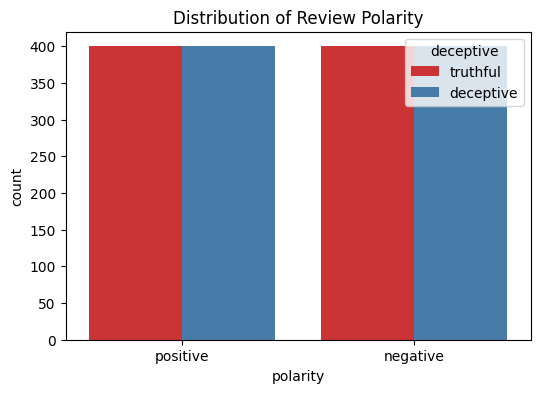

In [27]:
# Distribution of polarity
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='polarity', hue='deceptive', palette='Set1')
plt.title('Distribution of Review Polarity')
plt.show()

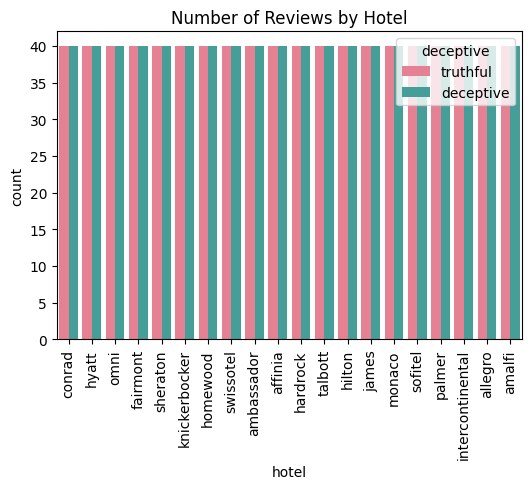

In [28]:
# Distribution of reviews by hotel
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='hotel', hue='deceptive', palette='husl', order=df['hotel'].value_counts().index)
plt.title('Number of Reviews by Hotel')
plt.xticks(rotation=90)
plt.show()


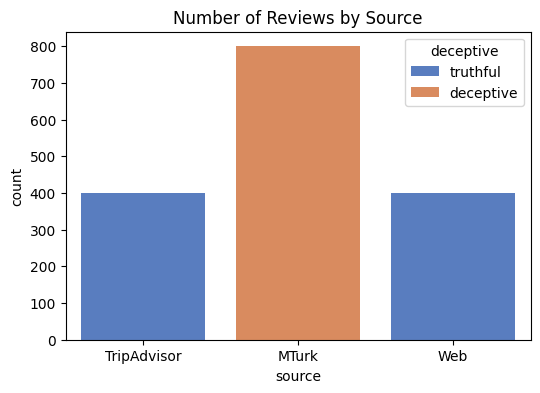

In [29]:
# Distribution of reviews by source
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='source', hue='deceptive', palette='muted')
plt.title('Number of Reviews by Source')
plt.show()

In [30]:
# Checking most common review texts
print("\nMost Common Review Text:")
print(df['text'].value_counts().head(3))


Most Common Review Text:
text
My daughter and I woke in the morning wanting to go swimming. When we arrived at the pool the water was covered by a white scum. I then attempted to use both of the phones at the pool, one white phone and one emergency red phone, to call the desk. Both were out of service!!!! I am glad there wasn't an emergency. As we were exited the pool area I ran into a hotel employee and told her about the problems and then asked her to call us when the pool was clean.... never heard back.\n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [31]:
# Define stopwords
stopwords_set = set(stopwords.words('english'))

# Text preprocessing function
def clean_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub('[^\w\s]', '', text).lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    words = [word for word in words if word not in stopwords_set]
    # POS tagging and filtering for nouns, verbs, and adjectives
    tagged_words = pos_tag(words)
    filtered_words = [word for word, tag in tagged_words if tag in ['NN', 'VB', 'JJ']]
    return ' '.join(filtered_words)

# Apply text preprocessing
df['processed_text'] = df['text'].apply(clean_text)

<>:7: SyntaxWarning: invalid escape sequence '\w'
<>:7: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Preet\AppData\Local\Temp\ipykernel_30636\3632008794.py:7: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('[^\w\s]', '', text).lower()


In [32]:
# Train-test split
X = df['processed_text']  # Features (processed text)
y = df['deceptive'].map({'truthful': 0, 'deceptive': 1})  # Binary target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


Classifier: Logistic Regression
Accuracy: 82.92%
Confusion Matrix:
 [[194  46]
 [ 36 204]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.83       240
           1       0.82      0.85      0.83       240

    accuracy                           0.83       480
   macro avg       0.83      0.83      0.83       480
weighted avg       0.83      0.83      0.83       480



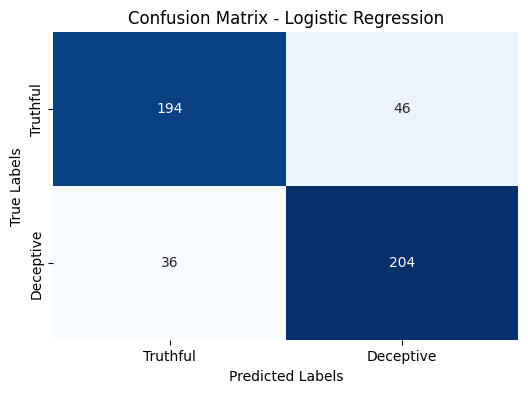


Classifier: Naive Bayes
Accuracy: 62.71%
Confusion Matrix:
 [[138 102]
 [ 77 163]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.57      0.61       240
           1       0.62      0.68      0.65       240

    accuracy                           0.63       480
   macro avg       0.63      0.63      0.63       480
weighted avg       0.63      0.63      0.63       480



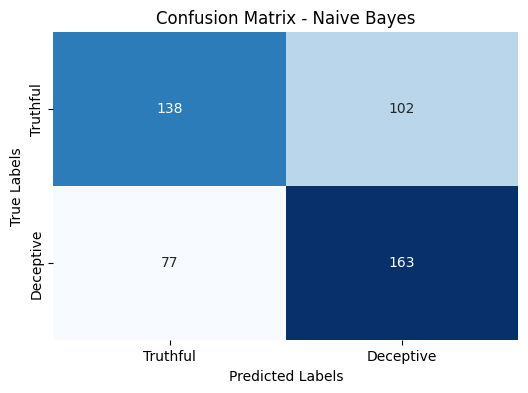


Classifier: k-Nearest Neighbors (k=5)
Accuracy: 72.71%
Confusion Matrix:
 [[152  88]
 [ 43 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.63      0.70       240
           1       0.69      0.82      0.75       240

    accuracy                           0.73       480
   macro avg       0.74      0.73      0.72       480
weighted avg       0.74      0.73      0.72       480



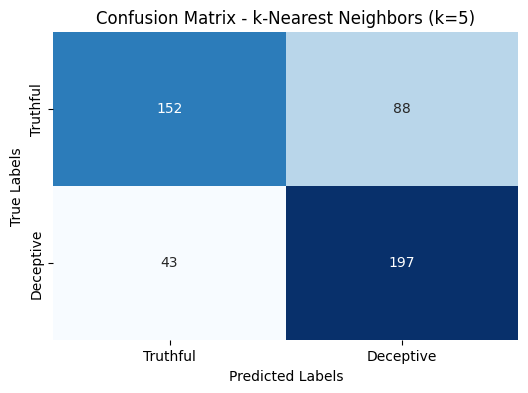


Classifier: Decision Tree
Accuracy: 67.08%
Confusion Matrix:
 [[162  78]
 [ 80 160]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.68      0.67       240
           1       0.67      0.67      0.67       240

    accuracy                           0.67       480
   macro avg       0.67      0.67      0.67       480
weighted avg       0.67      0.67      0.67       480



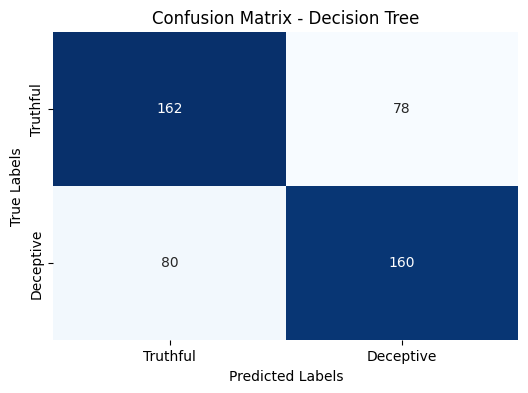


Classifier: Random Forest
Accuracy: 80.21%
Confusion Matrix:
 [[188  52]
 [ 43 197]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80       240
           1       0.79      0.82      0.81       240

    accuracy                           0.80       480
   macro avg       0.80      0.80      0.80       480
weighted avg       0.80      0.80      0.80       480



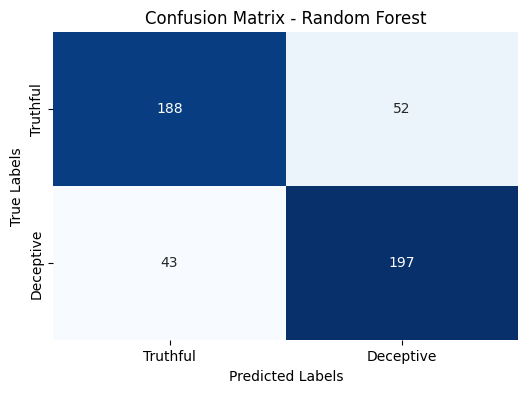


Classifier: Support Vector Machine
Accuracy: 82.29%
Confusion Matrix:
 [[195  45]
 [ 40 200]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       240
           1       0.82      0.83      0.82       240

    accuracy                           0.82       480
   macro avg       0.82      0.82      0.82       480
weighted avg       0.82      0.82      0.82       480



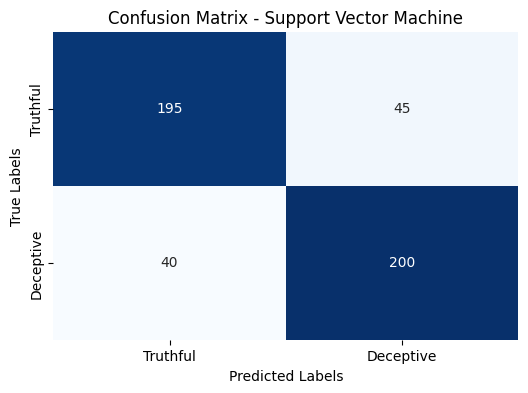

In [33]:
# Classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "k-Nearest Neighbors (k=5)": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Model training and evaluation
for name, classifier in classifiers.items():
    print(f"\nClassifier: {name}")
    if name == "Naive Bayes":  # Naive Bayes requires dense input
        classifier.fit(X_train_tfidf.toarray(), y_train)
        y_pred = classifier.predict(X_test_tfidf.toarray())
    else:
        classifier.fit(X_train_tfidf, y_train)
        y_pred = classifier.predict(X_test_tfidf)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:\n", conf_matrix)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Visualizing confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Truthful', 'Deceptive'], 
                yticklabels=['Truthful', 'Deceptive'])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()

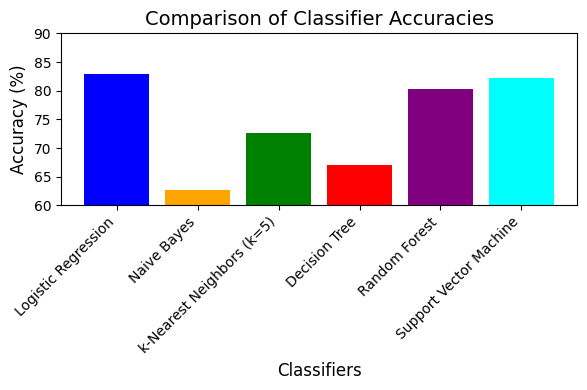

In [34]:
# Accuracy comparison plot
classifier_names = list(classifiers.keys())
accuracies = [
    accuracy_score(y_test, classifiers[name].predict(X_test_tfidf if name != "Naive Bayes" else X_test_tfidf.toarray())) * 100
    for name in classifier_names
]

plt.figure(figsize=(6, 4))
plt.bar(classifier_names, accuracies, color=['blue', 'orange', 'green', 'red', 'purple', 'cyan'])
plt.xlabel("Classifiers", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Comparison of Classifier Accuracies", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.ylim(60, 90)
plt.tight_layout()
plt.show()

In [35]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
truthful_reviews = df[df['deceptive'] == 'truthful']
deceptive_reviews = df[df['deceptive'] == 'deceptive']
print(truthful_reviews.head(5))

  deceptive   hotel  polarity       source  \
0  truthful  conrad  positive  TripAdvisor   
1  truthful   hyatt  positive  TripAdvisor   
2  truthful   hyatt  positive  TripAdvisor   
3  truthful    omni  positive  TripAdvisor   
4  truthful   hyatt  positive  TripAdvisor   

                                                text  \
0  We stayed for a one night getaway with family ...   
1  Triple A rate with upgrade to view room was le...   
2  This comes a little late as I'm finally catchi...   
3  The Omni Chicago really delivers on all fronts...   
4  I asked for a high floor away from the elevato...   

                                      processed_text  
0  stayed night getaway family thursday triple aa...  
1  triple rate upgrade view room breakfast great ...  
2  little late im several hyatt regency late octo...  
3  spaciousness helpful staff location avenue add...  
4  high floor elevator room functional clean whol...  


In [37]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [38]:
# combined truthful and deceptive reviews into distinct strings
truthful_text = " ".join(review for review in truthful_reviews['text'])
deceptive_text = " ".join(review for review in deceptive_reviews['text'])

In [39]:
# wordcloud for truthful reviews
truthful_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(truthful_text)

# wordcloud for deceptive reviews
deceptive_wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(deceptive_text)

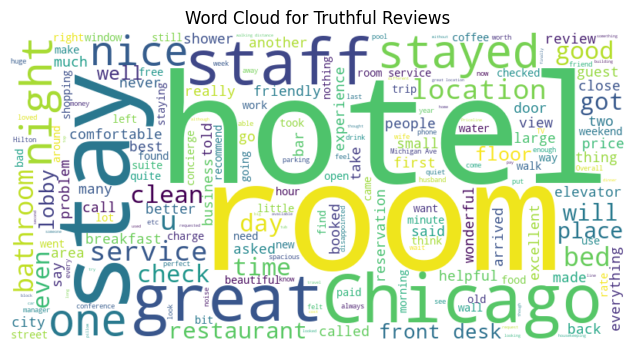

In [40]:
# Plot the WordCloud for truthful reviews
plt.figure(figsize=(8, 4))
plt.imshow(truthful_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Truthful Reviews')
plt.axis('off')
plt.show()

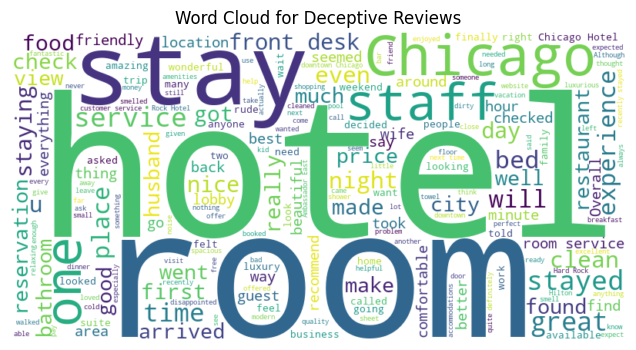

In [41]:
# Plot the WordCloud for deceptive reviews
plt.figure(figsize=(8, 4))
plt.imshow(deceptive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Deceptive Reviews')
plt.axis('off')
plt.show()